In [4]:
from tslearn.utils import to_time_series
my_first_time_series = [1, 3, 4, 2]
formatted_time_series = to_time_series(my_first_time_series)
formatted_time_series

array([[1.],
       [3.],
       [4.],
       [2.]])

In [6]:
from tslearn.utils import to_time_series_dataset
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])
print(formatted_dataset.shape)
my_third_time_series = [1, 2, 4, 2, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series,
                                                my_second_time_series,
                                                my_third_time_series])
formatted_dataset

(2, 4, 1)


array([[[ 1.],
        [ 3.],
        [ 4.],
        [ 2.],
        [nan]],

       [[ 1.],
        [ 2.],
        [ 4.],
        [ 2.],
        [nan]],

       [[ 1.],
        [ 2.],
        [ 4.],
        [ 2.],
        [ 2.]]])

In [8]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(formatted_dataset)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=3, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-06, verbose=0)

0.008 --> 0.006 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 


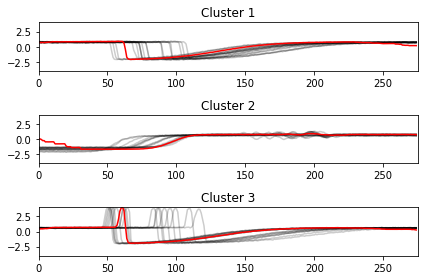

In [11]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes and 50 first time series
X_train = X_train[y_train < 4]
X_train = X_train[:50]
numpy.random.shuffle(X_train)
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

# kShape clustering
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()